<a href="https://colab.research.google.com/github/Manjunath3304/Python-Project/blob/main/Sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/content/googleplaystore.csv')

In [4]:
#head of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#last rows of dataset
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'missing values percentage in data set')

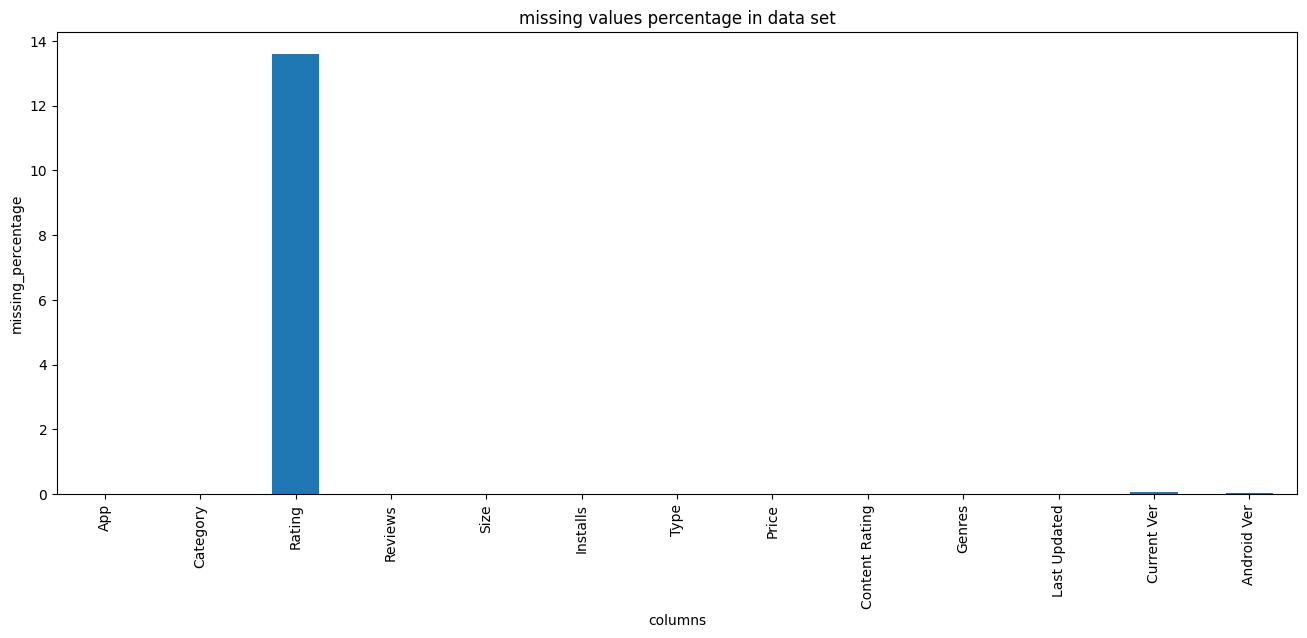

In [7]:
# make figsize plot
plt.figure(figsize=(16,6))
# plot the missing values percentage
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('columns')
plt.ylabel('missing_percentage')
plt.title('missing values percentage in data set')

<ipython-input-8-87c8eb46f429>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette='viridis')


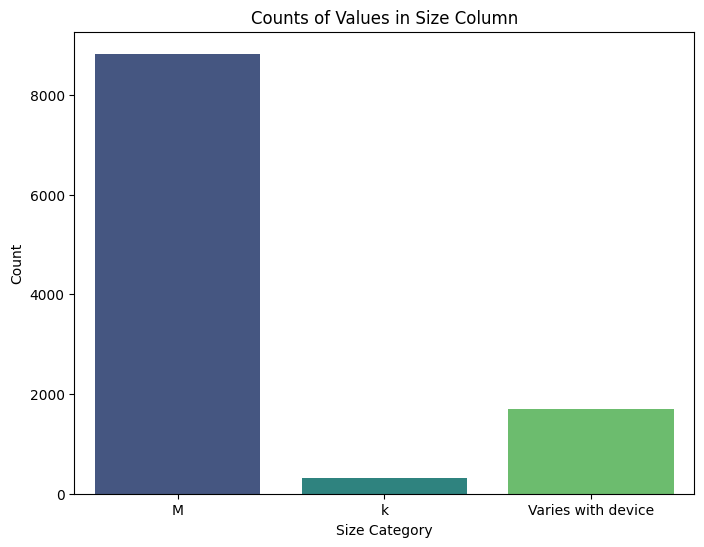

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Counts of values containing 'M'
m_counts = df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

# Counts of values containing 'k'
k_counts = df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

# Counts of values containing 'Varies with device'
varies_counts = df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

# Visualize the counts
sizes = [m_counts, k_counts, varies_counts]
labels = ['M', 'k', 'Varies with device']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=sizes, palette='viridis')
plt.title('Counts of Values in Size Column')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()


In [10]:
def convert_installs(installs):
    if isinstance(installs, str):
        if '+' in installs:
            return int(installs.replace('+', '').replace(',', ''))
        elif ',' in installs:
            return int(installs.replace(',', ''))
        elif 'Free' in installs:
            return 0
    return installs

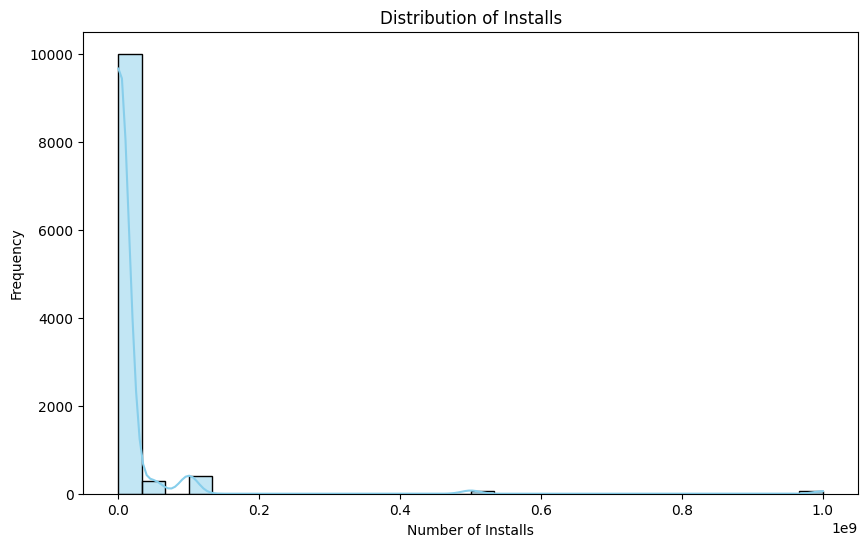

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and the conversion function is defined

# Apply the conversion function to 'Installs' column
df['Installs'] = df['Installs'].apply(convert_installs)

# Convert the 'Installs' column to integers
df['Installs'] = pd.to_numeric(df['Installs'])

# Visualize the distribution of 'Installs'
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()
